In [1]:
import pandas as pd
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../playground-series-s5e8/train.csv')

In [4]:
df['pdays'].unique()

array([ -1, 175,  91, 181, 252,  90, 211, 183,  87, 168, 172, 364, 266,
       122,  94, 196, 324,  92, 348,  97, 173, 190, 271, 374, 185, 366,
       339, 204, 399, 340,  88, 154,  24, 188, 370, 150, 365, 101, 133,
       355,  83,  99, 247, 259, 350, 189,  95, 180, 367, 371, 265, 151,
       363,  85,  86, 347, 131, 184, 344, 459, 352, 360,  96, 104, 334,
       186, 135, 362,  40, 280, 361, 178, 202, 244, 776, 109, 351, 293,
       182, 192, 353, 356, 187, 369, 191, 170, 255, 317, 174, 321, 169,
       177, 105, 315, 176, 346, 132, 330, 287,  70, 368, 381, 478, 262,
       342, 157, 254, 331, 171, 149, 153,  89, 234, 107,   8,  93, 322,
       253, 103, 245, 251, 127, 336, 357, 258, 226, 197, 140, 250, 354,
       102, 299, 193, 337, 111, 179, 343,   2, 286, 205, 264, 267, 302,
       142, 148, 325,  81, 461, 195, 274, 308, 508, 345, 440, 586, 358,
       222, 332, 314, 200, 263, 272, 305, 289, 298,  98, 238, 294, 160,
       273, 359, 113, 511, 165, 288, 120, 115,   9, 301,   1, 15

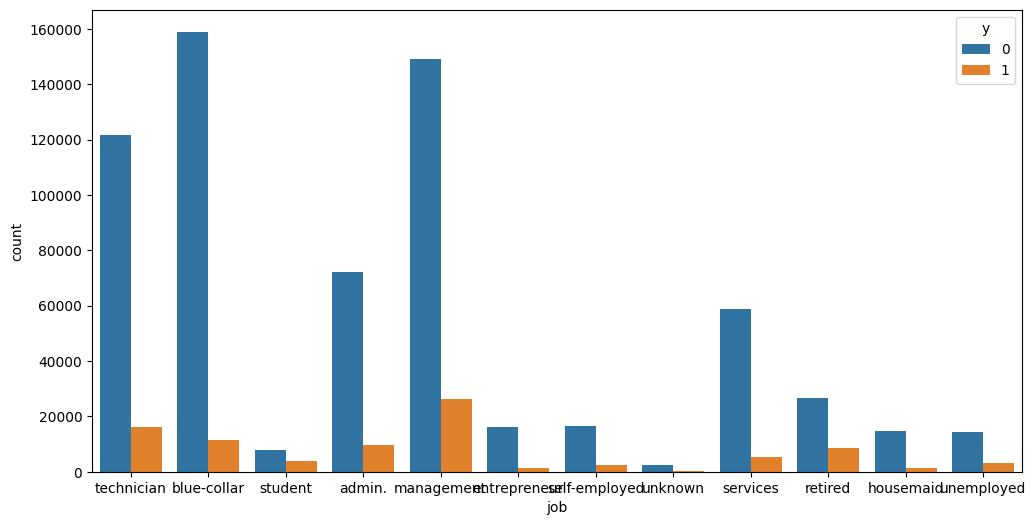

In [8]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.show()

In [3]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
df['previous'].value_counts()

previous
0      672431
1       28342
2       20468
3       10326
4        6239
5        3882
6        2183
7        1730
8        1036
9         697
11        503
10        501
13        327
12        320
14        137
15        130
17        103
16         81
19         77
23         74
18         56
20         56
22         43
24         34
29         29
27         29
28         23
21         22
25         20
26         17
30         15
31          9
36          8
37          7
35          6
38          6
32          5
51          4
43          4
41          4
33          3
34          3
55          2
39          2
40          1
47          1
46          1
200         1
48          1
58          1
Name: count, dtype: int64

In [5]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
con = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for cat in cat:
    df[cat] = df[cat].astype('category')

print(df.info())
X=df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = df['y']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   id         750000 non-null  int64   
 1   age        750000 non-null  int64   
 2   job        750000 non-null  category
 3   marital    750000 non-null  category
 4   education  750000 non-null  category
 5   default    750000 non-null  category
 6   balance    750000 non-null  int64   
 7   housing    750000 non-null  category
 8   loan       750000 non-null  category
 9   contact    750000 non-null  category
 10  day        750000 non-null  int64   
 11  month      750000 non-null  category
 12  duration   750000 non-null  int64   
 13  campaign   750000 non-null  int64   
 14  pdays      750000 non-null  int64   
 15  previous   750000 non-null  int64   
 16  poutcome   750000 non-null  category
 17  y          750000 non-null  int64   
dtypes: category(9), int64(9)
memory usage: 57.9 

In [6]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   job        750000 non-null  category
 1   marital    750000 non-null  category
 2   education  750000 non-null  category
 3   default    750000 non-null  category
 4   housing    750000 non-null  category
 5   loan       750000 non-null  category
 6   contact    750000 non-null  category
 7   month      750000 non-null  category
 8   poutcome   750000 non-null  category
dtypes: category(9)
memory usage: 6.4 MB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train_cat = torch.tensor(X_train[cat].apply(lambda x: x.cat.codes).values, dtype=torch.long)
X_train_con = torch.tensor(X_train[con].values, dtype=torch.float)

X_test_cat = torch.tensor(X_test[cat].apply(lambda x: x.cat.codes).values, dtype=torch.long)
X_test_con = torch.tensor((X_test[con]).values, dtype=torch.float)

y_train = torch.tensor(y_train.values, dtype=torch.float).reshape(-1,1)

y_test = torch.tensor(y_test.values, dtype=torch.float).reshape(-1,1)

train_data = TensorDataset(X_train_cat, X_train_con, y_train)
test_data = TensorDataset(X_test_cat, X_test_con, y_test)

train_data = DataLoader(train_data, batch_size=1265, shuffle=True)
test_data = DataLoader(test_data, batch_size=1265, shuffle=True)

In [8]:
emb_szs = [(len(df[c].cat.categories), min(50, (len(df[c].cat.categories) + 1) // 2)) for c in cat]

print(emb_szs)

[(12, 6), (3, 2), (4, 2), (2, 1), (2, 1), (2, 1), (3, 2), (12, 6), (4, 2)]


In [9]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_con, out_feature, layers, p=0.5):
        super().__init__()
        self.embed = nn.ModuleList(nn.Embedding(ni,nf) for ni, nf in emb_szs)
        self.drop = nn.Dropout(p)
        self.norm = nn.BatchNorm1d(n_con)

        layerlist = []

        n_in = n_con + sum(nf for ni,nf in emb_szs)
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.LeakyReLU (inplace=True))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_feature))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_con):
        embedding = []
        for i,e in enumerate(self.embed):
            embedding.append(e(x_cat[:,i]))
        x = torch.cat(embedding, axis=1)

        x_cont = self.norm(x_con)
        x_cont = self.drop(x_cont)

        x = torch.cat([x,x_cont], dim=1)

        x = self.layers(x)

        return x

In [10]:
model = TabularModel(emb_szs, len(con), 1, [20,10], 0.2)

num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
pos_weight = torch.tensor([num_neg / num_pos], dtype=torch.float)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [11]:
from sklearn.metrics import roc_auc_score
epochs=1000
losses = []
val_loss=[]
patience = 20
best_auc = 0
counter=0

for i in range(epochs):
    model.train()
    all_pred=[]
    all_train = []
    roc_score = 0.0
    avg_loss = 0.0
    for x_tr_cat,x_tr_con, y_tr in train_data:
        y_tr_pred = model.forward(x_tr_cat, x_tr_con)
        loss = criterion(y_tr_pred, y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        all_pred.extend(y_tr_pred.cpu().detach().numpy())
        all_train.extend(y_tr.cpu().detach().numpy())
        avg_loss+=loss.item()
    roc_score = roc_auc_score(all_train, all_pred)
    avg_loss = avg_loss/len(train_data)
    losses.append(avg_loss)

    all_val_pred = []
    all_val = []
    roc_score_val = 0.0
    val_avg_loss = 0.0
    model.eval()
    with torch.no_grad():
        for x_te_cat, x_te_con, y_te in test_data:
            y_te_pred = model.forward(x_te_cat, x_te_con)
            loss = criterion(y_te_pred, y_te)
            val_avg_loss+=loss.item()
            all_val.extend(y_te.cpu().detach().numpy())
            all_val_pred.extend(y_te_pred.cpu().detach().numpy())
        roc_score_val = roc_auc_score(all_val, all_val_pred)
        val_avg_loss = val_avg_loss/len(test_data)
        val_loss.append(val_avg_loss)
    print(f'Epoch: {i+1:<8}Training Loss: {avg_loss:<8.4f}AUC: {roc_score:<8.4f}val_loss: {val_avg_loss:<8.4f}val_AUC: {roc_score_val:<8.4f}')
    min_delta = 0
    if roc_score_val > best_auc + min_delta:
        counter =0
        best_auc = roc_score_val
    else:
        counter+=1
        if counter >= patience:
            break

Epoch: 1       Training Loss: 0.8043  AUC: 0.8896  val_loss: 0.5627  val_AUC: 0.9467  
Epoch: 2       Training Loss: 0.6343  AUC: 0.9213  val_loss: 0.5057  val_AUC: 0.9499  
Epoch: 3       Training Loss: 0.6150  AUC: 0.9243  val_loss: 0.4961  val_AUC: 0.9504  
Epoch: 4       Training Loss: 0.6080  AUC: 0.9260  val_loss: 0.4877  val_AUC: 0.9517  
Epoch: 5       Training Loss: 0.6051  AUC: 0.9265  val_loss: 0.4858  val_AUC: 0.9518  
Epoch: 6       Training Loss: 0.5974  AUC: 0.9284  val_loss: 0.4759  val_AUC: 0.9530  
Epoch: 7       Training Loss: 0.5988  AUC: 0.9281  val_loss: 0.4797  val_AUC: 0.9532  
Epoch: 8       Training Loss: 0.5974  AUC: 0.9283  val_loss: 0.4837  val_AUC: 0.9523  
Epoch: 9       Training Loss: 0.5976  AUC: 0.9288  val_loss: 0.4825  val_AUC: 0.9524  
Epoch: 10      Training Loss: 0.5969  AUC: 0.9287  val_loss: 0.4792  val_AUC: 0.9529  
Epoch: 11      Training Loss: 0.5963  AUC: 0.9289  val_loss: 0.4818  val_AUC: 0.9523  
Epoch: 12      Training Loss: 0.5933  AUC: 

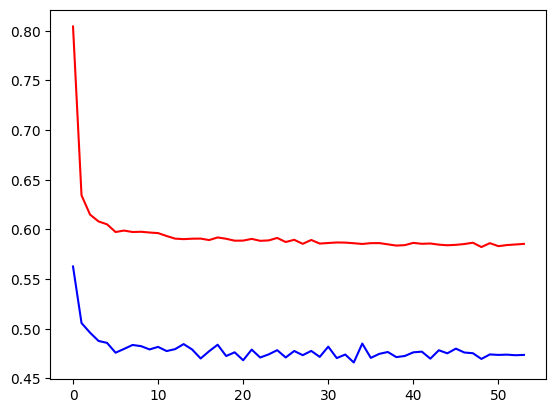

In [12]:
plt.plot(range(i+1), losses, color='r')
plt.plot(range(i+1), val_loss, color='b')
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

model.eval()

all_probs = []
all_targets = []

# If a GPU is available, use it; otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)  # will print 'cuda' if GPU is available, else 'cpu'

with torch.no_grad():
    for x_cat_batch, x_con_batch, y_batch in test_data:
        x_cat_batch = x_cat_batch.to(device)
        x_con_batch = x_con_batch.to(device)
        y_batch = y_batch.to(device)

        logits = model(x_cat_batch, x_con_batch)
        probs = torch.sigmoid(logits).squeeze()
        all_probs.append(probs.cpu())
        all_targets.append(y_batch.cpu())

all_probs = torch.cat(all_probs).numpy()
all_targets = torch.cat(all_targets).numpy()

precision, recall, thresholds = precision_recall_curve(all_targets, all_probs)

# Compute F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Best threshold for max F1:", best_threshold)


cpu
Best threshold for max F1: 0.99999964


C:\Users\jayde\AppData\Local\Temp\ipykernel_20224\3766234970.py:30: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

all_test_pred = []
all_test = []

model.eval()
with torch.no_grad():
    for x_test_cat, x_test_con, y_test_act in test_data:
        y_pred_test = model.forward(x_test_cat, x_test_con)
        y_pred_test = (y_pred_test > best_threshold).float()
        all_test_pred.extend(y_pred_test.squeeze().tolist())
        all_test.extend(y_test_act.squeeze().tolist())

print(classification_report(all_test, all_test_pred))
print(confusion_matrix(all_test, all_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95    198077
         1.0       0.64      0.74      0.69     26923

    accuracy                           0.92    225000
   macro avg       0.80      0.84      0.82    225000
weighted avg       0.92      0.92      0.92    225000

[[187101  10976]
 [  7134  19789]]


In [15]:
test = pd.read_csv('../playground-series-s5e8/test.csv')

In [16]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
con = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for cat in cat:
    test[cat] = test[cat].astype('category')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   id         250000 non-null  int64   
 1   age        250000 non-null  int64   
 2   job        250000 non-null  category
 3   marital    250000 non-null  category
 4   education  250000 non-null  category
 5   default    250000 non-null  category
 6   balance    250000 non-null  int64   
 7   housing    250000 non-null  category
 8   loan       250000 non-null  category
 9   contact    250000 non-null  category
 10  day        250000 non-null  int64   
 11  month      250000 non-null  category
 12  duration   250000 non-null  int64   
 13  campaign   250000 non-null  int64   
 14  pdays      250000 non-null  int64   
 15  previous   250000 non-null  int64   
 16  poutcome   250000 non-null  category
dtypes: category(9), int64(8)
memory usage: 17.4 MB


In [17]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
con = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
test_cat = torch.tensor(test[cat].apply(lambda x: x.cat.codes).values, dtype=torch.long)
test_con = torch.tensor(test[con].values, dtype=torch.float)

with torch.no_grad():
    pred = model.forward(test_cat, test_con)

In [18]:
pred.shape

torch.Size([250000, 1])

In [19]:
test['id'].shape

(250000,)

In [ ]:
submission = pd.DataFrame({
    'id':test['id'],
    'y':pred.flatten()
})

submission.to_csv('submission.csv', index=False)